In [1]:
#导入第三方库
import torch #pytorch框架
import pandas as pd #数据集读入库
import matplotlib.pyplot as plt #绘制图表
import torch.nn as nn #模型中的网络层使用
from torch import optim #优化器使用
from torch.utils.data import DataLoader, TensorDataset #数据集处理
from sklearn.model_selection import  train_test_split #数据划分

In [2]:
def round_half_int(x):
    return round(x * 2) / 2

In [3]:
#读取文件
movies_df = pd.read_csv("./movies.csv")
ratings_df = pd.read_csv("./ratings.csv")
tags_df = pd.read_csv("./tags.csv")

In [4]:
movies_df #9742部电影，每部电影的名字和类型都记录在案

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
ratings_df #100836次评分，每个用户对每个电影的评分都记录在案

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [6]:
tags_df #每个用户给电影的打的标签都记录在案

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [7]:
merged_movies_rating_df = pd.merge(ratings_df,movies_df,on="movieId",how="inner") #将需要的数据进行整合到一份表中

In [8]:
merged_movies_rating_df #在每一次评分中将电影的名字和类型加进去

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [9]:
merged_movies_rating_df["genres"].unique() #查看genres列中的唯一值

array(['Adventure|Animation|Children|Comedy|Fantasy', 'Comedy|Romance',
       'Action|Crime|Thriller', 'Mystery|Thriller',
       'Crime|Mystery|Thriller', 'Action|Comedy|Horror|Thriller',
       'Adventure|Comedy|Crime|Romance', 'Action|Drama|War',
       'Action|Drama|Romance|War', 'Comedy|War', 'Action|Romance|Western',
       'Comedy', 'Adventure|Comedy', 'Comedy|Drama',
       'Action|Adventure|Sci-Fi', 'Comedy|Crime|Drama|Thriller',
       'Action|Crime|Drama|Thriller', 'Comedy|Drama|Romance|War',
       'Adventure|Children|Romance', 'Action|Comedy|Crime|Fantasy',
       'Action|Thriller', 'Thriller', 'Action|Adventure|Sci-Fi|Thriller',
       'Drama|War', 'Comedy|Romance|Thriller',
       'Action|Adventure|Comedy|Romance', 'Action|Drama|Western',
       'Adventure|Drama|Western', 'Crime|Horror|Thriller',
       'Animation|Children|Fantasy|Musical',
       'Action|Adventure|Mystery|Thriller',
       'Adventure|Animation|Children|Fantasy|Musical',
       'Adventure|Animation|Chil

In [10]:
# 将"genres"列分割成多个列
genres_split = merged_movies_rating_df['genres'].str.get_dummies('|')  #使用get_dummies这个方法将genres这一列的数据分割出来形成新的特征列
genres_split #将标签分割开来

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
100832,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
100833,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
100834,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [11]:
# 将新生成的列与原始数据合并
df = pd.concat([merged_movies_rating_df, genres_split], axis=1)
df

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [12]:
#删除generes列
df.drop(columns=["genres"],inplace=True)

In [13]:
df #查看处理好的数据

,userId,movieId,rating,timestamp,title,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,964982703,Toy Story (1995),0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,847434962,Toy Story (1995),0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,7,1,4.5,1106635946,Toy Story (1995),0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,15,1,2.5,1510577970,Toy Story (1995),0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,17,1,4.5,1305696483,Toy Story (1995),0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100833,610,160836,3.0,1493844794,Hazard (2005),0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100834,610,163937,3.5,1493848789,Blair Witch (2016),0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [14]:
df['title'] #观察标题列

0                         Toy Story (1995)
1                         Toy Story (1995)
2                         Toy Story (1995)
3                         Toy Story (1995)
4                         Toy Story (1995)
                        ...               
100831                    Bloodmoon (1997)
100832    Sympathy for the Underdog (1971)
100833                       Hazard (2005)
100834                  Blair Witch (2016)
100835                           31 (2016)
Name: title, Length: 100836, dtype: object

In [15]:
df['title'] = df['title'].astype('category').cat.codes # 为电影标题创建唯一的整数编码

In [16]:
df['title']

0         8871
1         8871
2         8871
3         8871
4         8871
          ... 
100831    1193
100832    8251
100833    3818
100834    1150
100835     107
Name: title, Length: 100836, dtype: int16

In [17]:
df #查看数据

,userId,movieId,rating,timestamp,title,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,964982703,8871,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,847434962,8871,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,7,1,4.5,1106635946,8871,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,15,1,2.5,1510577970,8871,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,17,1,4.5,1305696483,8871,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,1193,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100832,610,160527,4.5,1479544998,8251,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100833,610,160836,3.0,1493844794,3818,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100834,610,163937,3.5,1493848789,1150,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [18]:
df.info() #检索信息

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   userId              100836 non-null  int64  
 1   movieId             100836 non-null  int64  
 2   rating              100836 non-null  float64
 3   timestamp           100836 non-null  int64  
 4   title               100836 non-null  int16  
 5   (no genres listed)  100836 non-null  int64  
 6   Action              100836 non-null  int64  
 7   Adventure           100836 non-null  int64  
 8   Animation           100836 non-null  int64  
 9   Children            100836 non-null  int64  
 10  Comedy              100836 non-null  int64  
 11  Crime               100836 non-null  int64  
 12  Documentary         100836 non-null  int64  
 13  Drama               100836 non-null  int64  
 14  Fantasy             100836 non-null  int64  
 15  Film-Noir           100836 non-nul

In [19]:
#同一电影的打分取平均值
#rating_df = df.groupby(['movieId'])['rating'].mean().apply(round_half_int).reset_index()
#rating_df

In [20]:
# 删除同一movie_id的重复数据，只保留一个
#df_unique = df.drop_duplicates(subset='movieId', keep='first')
#df_unique

In [21]:
#df_unique=df_unique.sort_values(by='movieId').reset_index()
#df_unique

In [22]:
#df_unique.drop(columns=['rating'],inplace=True)
#df_unique

In [23]:
#df_unique = pd.merge(df_unique, rating_df, on='movieId')
#df_unique

In [24]:
#df_unique.drop(columns=['index'],inplace=True)
#df_unique

In [25]:
# 合并唯一投票结果到原始数据集
#df = df_unique
#df

In [26]:
#df=df.sort_values(by=['userId','movieId']).reset_index()
#df=df.drop(columns='index')
#df

In [27]:
unique_votes = df.groupby(["userId", "movieId"])["rating"].mean().apply(round_half_int).reset_index()

In [28]:
df_unique = df.drop_duplicates(subset="movieId", keep="first")

In [29]:
df = pd.merge(df_unique,unique_votes,on=["userId", "movieId"],how="left",suffixes=("", "_unique"),)

In [30]:
df=df.drop(columns=["userId"])
df=df.drop(columns=["timestamp"])
df=df.drop(columns=["rating"])
df

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating_unique
0,1,8871,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,4.0
1,3,3661,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,4.0
2,6,3845,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,4.0
3,47,7523,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,5.0
4,50,9119,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,160341,1193,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2.0
9720,160527,8251,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4.0
9721,160836,3818,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3.0
9722,163937,1150,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,4.0


In [31]:
df.shape #观察数据量和特征列数量

(9724, 23)

In [32]:
# 数据划分选取特征列和目标列
features = df.iloc[:,df.columns!="rating_unique"].values
target = df.iloc[:,df.columns=="rating_unique"].values

In [33]:
features

array([[     1,   8871,      0, ...,      0,      0,      0],
       [     3,   3661,      0, ...,      0,      0,      0],
       [     6,   3845,      0, ...,      1,      0,      0],
       ...,
       [160836,   3818,      0, ...,      1,      0,      0],
       [163937,   1150,      0, ...,      1,      0,      0],
       [163981,    107,      0, ...,      0,      0,      0]], dtype=int64)

In [34]:
target

array([[4.],
       [4.],
       [4.],
       ...,
       [3.],
       [4.],
       [4.]])

In [35]:
#划分第一个训练集和测试集
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.1,random_state=99)

In [36]:
# 划分第二个训练集和测试集
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(features, target, test_size=0.1, random_state=2021)

# 划分第三个训练集和测试集
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(features, target, test_size=0.1, random_state=2000)

In [37]:
X_train

array([[79242,  4732,     0, ...,     0,     0,     0],
       [69306,  8282,     0, ...,     1,     0,     0],
       [ 3417,  2040,     0, ...,     0,     0,     0],
       ...,
       [ 1010,  5246,     0, ...,     0,     0,     0],
       [ 4231,  7831,     0, ...,     0,     0,     0],
       [31435,  7255,     0, ...,     0,     0,     0]], dtype=int64)

In [38]:
Y_train

array([[3.],
       [4.],
       [3.],
       ...,
       [3.],
       [4.],
       [4.]])

In [39]:
#数据转换，转换成为能够使用torch训练类型和验证的类型
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train,dtype=torch.long)
X_test_tensor = torch.tensor(X_test,dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test,dtype=torch.long)
X_train_2_tensor = torch.tensor(X_train_2, dtype=torch.float32)
Y_train_2_tensor = torch.tensor(Y_train_2,dtype=torch.long)
X_test_2_tensor = torch.tensor(X_test_2,dtype=torch.float32)
Y_test_2_tensor = torch.tensor(Y_test_2,dtype=torch.long)
X_train_3_tensor = torch.tensor(X_train_3, dtype=torch.float32)
Y_train_3_tensor = torch.tensor(Y_train_3,dtype=torch.long)
X_test_3_tensor = torch.tensor(X_test_3,dtype=torch.float32)
Y_test_3_tensor = torch.tensor(Y_test_3,dtype=torch.long)

In [40]:
Y_train_tensor

tensor([[3],
        [4],
        [3],
        ...,
        [3],
        [4],
        [4]])

In [41]:
X_train_tensor

tensor([[7.9242e+04, 4.7320e+03, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [6.9306e+04, 8.2820e+03, 0.0000e+00,  ..., 1.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.4170e+03, 2.0400e+03, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [1.0100e+03, 5.2460e+03, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [4.2310e+03, 7.8310e+03, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.1435e+04, 7.2550e+03, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])

In [42]:
#数据转换为批次进行训练
train_data = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
train_data_2 = TensorDataset(X_train_2_tensor, Y_train_2_tensor)
train_loader_2 = DataLoader(train_data_2, batch_size=128, shuffle=True)
train_data_3 = TensorDataset(X_train_3_tensor, Y_train_3_tensor)
train_loader_3 = DataLoader(train_data_3, batch_size=128, shuffle=True)

In [43]:
#多层感知机模型参数
#创建多层感知机模型，神经网络
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.conv1 = nn.Conv1d(1, 64, kernel_size=3)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * ((input_size - 2) // 2), 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64,32)
        self.fc5 = nn.Linear(32,16)
        self.fc6 = nn.Linear(16,6)


    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        x = nn.functional.relu(x)
        x = self.fc3(x)
        x = nn.functional.relu(x)
        x = self.fc4(x)
        x = nn.functional.relu(x)
        x = self.fc5(x)
        x = nn.functional.relu(x)
        x = self.fc6(x)
        return x

In [44]:
X_train.shape[1] #特征列的数量

22

In [46]:
model = MLP(X_train.shape[1]) #输入量为特征列的数量
# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)  #学习率定义和优化器定义
# 模型训练
epochs = 50 #设置训练次数
model_acc = 0.0 #用于保存模型最好的准确率
train_loss_data_1 = []  #记录第一次的训练的损失
test_loss_data_1 = [] #记录第一次的测试的损失
for epoch in range(epochs):
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X.unsqueeze(1))
        loss = criterion(outputs, batch_y.squeeze()) # 计算损失值
        loss.backward()
        optimizer.step()
    train_loss_data_1.append(loss.item())
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}') #输出训练次数和当前损失

# 模型评估
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor.unsqueeze(1))  #模型进行预测
        test_loss = criterion(test_outputs, Y_test_tensor.squeeze()) #计算测试损失值
        _, predicted_labels = torch.max(test_outputs, 1) #选择6个标签中概率最高
        accuracy = (predicted_labels == Y_test_tensor).float().mean().item()

    print(f'Test Accuracy: {accuracy * 100:.2f}%') #输出准确率
    if model_acc <accuracy*100:
        model_acc = accuracy*100 #保留最好的准确率值
    test_loss_data_1.append(test_loss.item()) #保存测试损失值，用于可视化
    print(f'Test Loss: {test_loss.item()}') #输出测试损失值
print(f'Test Accuracy max: {model_acc:.2f}%')


Epoch 1/50, Loss: 4.165963172912598
Test Accuracy: 42.48%
Test Loss: 2.0509836673736572
Epoch 2/50, Loss: 1.6922324895858765
Test Accuracy: 42.10%
Test Loss: 1.7108148336410522
Epoch 3/50, Loss: 1.47120201587677
Test Accuracy: 41.21%
Test Loss: 1.613373041152954
Epoch 4/50, Loss: 1.502328634262085
Test Accuracy: 41.39%
Test Loss: 1.5607407093048096
Epoch 5/50, Loss: 1.328402042388916
Test Accuracy: 41.58%
Test Loss: 1.5265098810195923
Epoch 6/50, Loss: 1.5297236442565918
Test Accuracy: 40.51%
Test Loss: 1.5038961172103882
Epoch 7/50, Loss: 1.4795993566513062
Test Accuracy: 42.32%
Test Loss: 1.5013985633850098
Epoch 8/50, Loss: 1.6870710849761963
Test Accuracy: 40.27%
Test Loss: 1.5092145204544067
Epoch 9/50, Loss: 1.4499396085739136
Test Accuracy: 42.68%
Test Loss: 1.506161093711853
Epoch 10/50, Loss: 1.4564048051834106
Test Accuracy: 39.51%
Test Loss: 1.5125054121017456
Epoch 11/50, Loss: 1.427570104598999
Test Accuracy: 39.48%
Test Loss: 1.5216548442840576
Epoch 12/50, Loss: 1.346513

In [23]:
model2 = MLP(X_train_2.shape[1])
# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss() #损失函数初始化
optimizer = optim.Adam(model2.parameters(), lr=0.001) #学习率定义和优化器定义

# 模型训练
epochs = 50 #训练次数
train_loss_data_2 = [] #记录第二次训练的损失
test_loss_data_2 = [] #记录第二次的测试的损失
model2_acc = 0.0 #用于保存第二次模型最好的准确率
for epoch in range(epochs):
    for batch_X, batch_y in train_loader_2:
        optimizer.zero_grad()
        outputs = model2(batch_X.unsqueeze(1))
        loss = criterion(outputs, batch_y.squeeze()) #计算损失
        loss.backward()
        optimizer.step()
    train_loss_data_2.append(loss.item())#记录训练损失值，用于可视化
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}') #输出训练次数和当前损失

    # 模型评估
    model2.eval()
    with torch.no_grad():
        test_outputs = model(X_test_2_tensor.unsqueeze(1)) #模型进行预测
        test_loss = criterion(test_outputs, Y_test_2_tensor.squeeze()) #损失计算
        _, predicted_labels = torch.max(test_outputs, 1) #选择6个标签中概率最高
        accuracy = (predicted_labels == Y_test_2_tensor).float().mean().item() #计算准确率

    print(f'Test Accuracy: {accuracy * 100:.2f}%') #输出准确率
    if model2_acc < accuracy*100:
        model2_acc = accuracy*100
    test_loss_data_2.append(test_loss.item()) #记录测试损失值，用于可视化
    print(f'Test Loss: {test_loss.item()}')


Epoch 9/50, Loss: 1.7088814973831177
Test Accuracy: 19.95%
Test Loss: 1.7223858833312988
Epoch 1/50, Loss: 43040.296875
Test Accuracy: 45.78%
Test Loss: 1.4399957656860352
Epoch 2/50, Loss: 41095.0
Test Accuracy: 45.78%
Test Loss: 1.4399957656860352
Epoch 3/50, Loss: 9735.2734375
Test Accuracy: 45.78%
Test Loss: 1.4399957656860352
Epoch 4/50, Loss: 12902.6806640625
Test Accuracy: 45.78%
Test Loss: 1.4399957656860352
Epoch 5/50, Loss: 4312.517578125
Test Accuracy: 45.78%
Test Loss: 1.4399957656860352
Epoch 6/50, Loss: 11043.0400390625
Test Accuracy: 45.78%
Test Loss: 1.4399957656860352
Epoch 7/50, Loss: 3828.1962890625
Test Accuracy: 45.78%
Test Loss: 1.4399957656860352
Epoch 8/50, Loss: 6367.50048828125
Test Accuracy: 45.78%
Test Loss: 1.4399957656860352
Epoch 9/50, Loss: 2345.871337890625
Test Accuracy: 45.78%
Test Loss: 1.4399957656860352
Epoch 10/50, Loss: 4801.9638671875
Test Accuracy: 45.78%
Test Loss: 1.4399957656860352
Epoch 11/50, Loss: 998.684814453125
Test Accuracy: 45.78%
Te

In [24]:
model3 = MLP(X_train_3.shape[1])
# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model3.parameters(), lr=0.001) #学习率定义和优化器定义

# 模型训练
epochs = 50 #训练次数
model3_acc = 0.0 #第三个模型最好的准确率
train_loss_data_3 = [] #记录第三次的训练的损失
test_loss_data_3 = [] #记录第三次的测试的损失
for epoch in range(epochs):
    for batch_X, batch_y in train_loader_3:
        optimizer.zero_grad()
        outputs = model3(batch_X.unsqueeze(1))
        loss = criterion(outputs, batch_y.squeeze()) # 计算损失值
        loss.backward()
        optimizer.step()
    train_loss_data_3.append(loss.item()) #记录损失值，用于可视化
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}') #输出训练次数和当前损失

    # 模型评估
    model3.eval()
    with torch.no_grad():
        test_outputs = model3(X_test_3_tensor.unsqueeze(1))
        test_loss = criterion(test_outputs, Y_test_3_tensor.squeeze())
        _, predicted_labels = torch.max(test_outputs, 1)
        accuracy = (predicted_labels == Y_test_3_tensor).float().mean().item()

    print(f'Test Accuracy: {accuracy * 100:.2f}%')
    if model3_acc < accuracy*100 :
        model3_acc = accuracy*100
    test_loss_data_3.append(test_loss.item())
    print(f'Test Loss: {test_loss.item()}')


Epoch 1/50, Loss: 1.9224979877471924
Test Accuracy: 9.77%
Test Loss: 1.8678066730499268
Epoch 2/50, Loss: 1.877793550491333
Test Accuracy: 9.77%
Test Loss: 1.8400883674621582
Epoch 3/50, Loss: 1.8403706550598145
Test Accuracy: 9.77%
Test Loss: 1.8117825984954834
Epoch 4/50, Loss: 1.8282585144042969
Test Accuracy: 20.08%
Test Loss: 1.7839078903198242
Epoch 5/50, Loss: 1.7802640199661255
Test Accuracy: 20.08%
Test Loss: 1.7574514150619507
Epoch 6/50, Loss: 1.7240031957626343
Test Accuracy: 20.08%
Test Loss: 1.7323977947235107
Epoch 7/50, Loss: 1.7074980735778809
Test Accuracy: 20.08%
Test Loss: 1.708257794380188
Epoch 8/50, Loss: 1.6879591941833496
Test Accuracy: 44.11%
Test Loss: 1.6857519149780273
Epoch 9/50, Loss: 1.6937460899353027
Test Accuracy: 44.11%
Test Loss: 1.6648874282836914
Epoch 10/50, Loss: 1.5803428888320923
Test Accuracy: 44.11%
Test Loss: 1.6454986333847046
Epoch 11/50, Loss: 1.6307719945907593
Test Accuracy: 44.11%
Test Loss: 1.6273021697998047
Epoch 12/50, Loss: 1.561

In [25]:
avg_acc = (model_acc+model2_acc+model3_acc)/3
print(f"平均准确率:{avg_acc:.2f}")

平均准确率:44.85


In [26]:
Y_test.shape

(2918, 1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


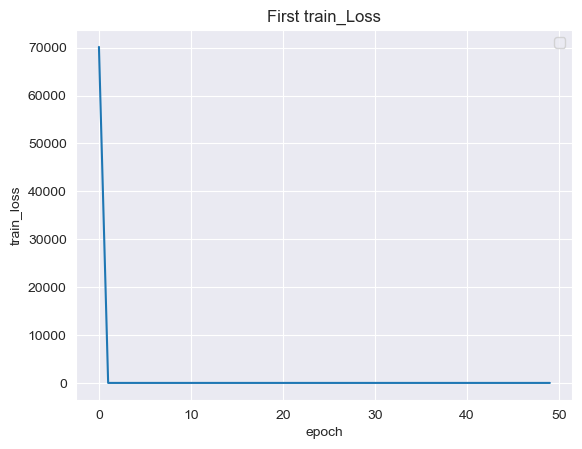

In [27]:
# 将 PyTorch 张量转为 NumPy 数组并去除维度为 1 的维度
# 绘制图表
plt.plot(range(50), train_loss_data_1, label='Training Loss')  # 添加 label 参数
plt.xlabel('epoch')
plt.ylabel('train_loss')
plt.title("First train_Loss")
plt.legend()  # 现在这里将显示"Training Loss"
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


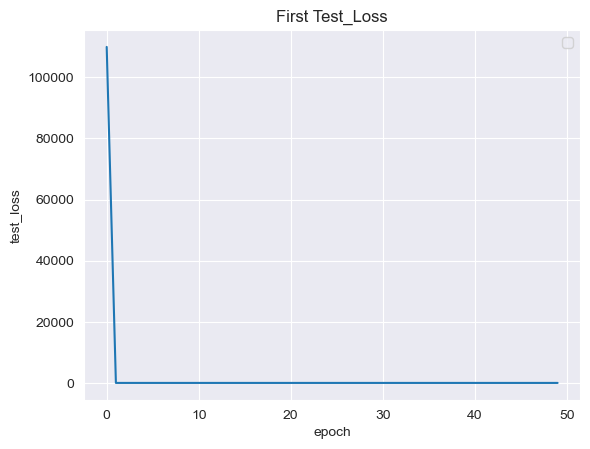

In [28]:
# 绘制图表
plt.plot(range(50),test_loss_data_1, label='Training Loss')
plt.xlabel('epoch')
plt.ylabel('test_loss')
plt.title("First Test_Loss")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


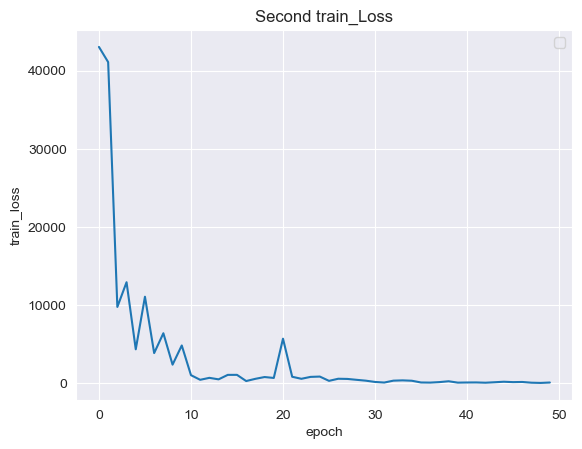

In [29]:
# 绘制图表
plt.plot(range(50),train_loss_data_2, label='Training Loss')
plt.xlabel('epoch')
plt.ylabel('train_loss')
plt.title("Second train_Loss")
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


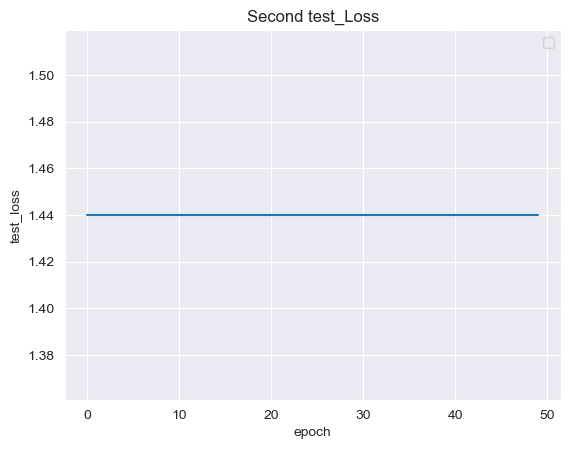

In [30]:
# 绘制图表
plt.plot(range(50),test_loss_data_2, label='Training Loss')
plt.xlabel('epoch')
plt.ylabel('test_loss')
plt.title("Second test_Loss")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


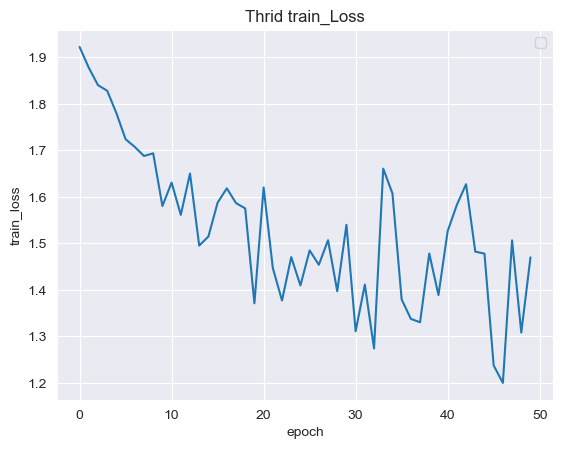

In [31]:
# 绘制图表
plt.plot(range(50),train_loss_data_3, label='Training Loss')
plt.xlabel('epoch')
plt.ylabel('train_loss')
plt.title("Thrid train_Loss")
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


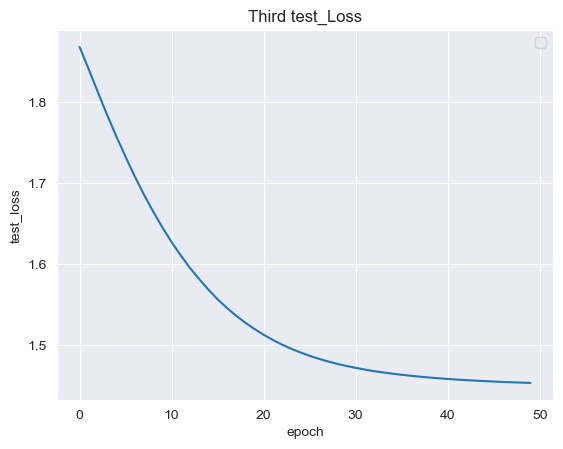

In [32]:
# 绘制图表
plt.plot(range(50),test_loss_data_3, label='Training Loss')
plt.xlabel('epoch')
plt.ylabel('test_loss')
plt.title("Third test_Loss")
plt.legend()
plt.show()
